In [1]:
import numpy as np
import matplotlib.pyplot as plt


Epoch 0/1000, Error: 0.32981578587208044
Epoch 100/1000, Error: 0.04510150934349261
Epoch 200/1000, Error: 0.02819103287210267
Epoch 300/1000, Error: 0.02297464420642825
Epoch 400/1000, Error: 0.02006297234372445
Epoch 500/1000, Error: 0.018088412542525342
Epoch 600/1000, Error: 0.016624638757991816
Epoch 700/1000, Error: 0.015483754015681401
Epoch 800/1000, Error: 0.014564938380743353
Epoch 900/1000, Error: 0.013807176664705108


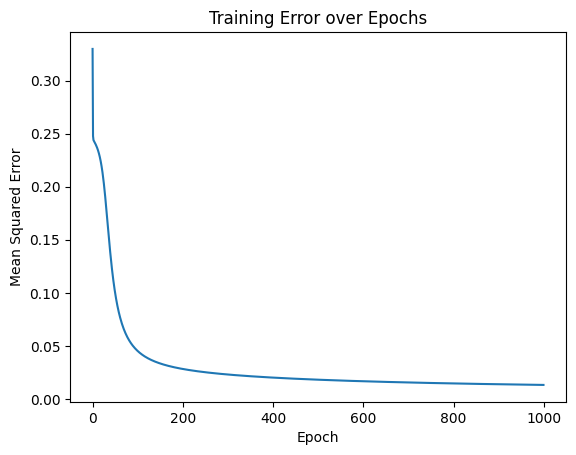


Test Input: [[0.7 0.3]]
Predicted Output: [[0.40963735]]


In [2]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_input_hidden = np.random.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden_output = np.random.rand(output_size)
        self.learning_rate = learning_rate
        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    def forward(self, inputs):
        self.hidden_activations = self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_input_hidden)
        self.output_activations = self.sigmoid(np.dot(self.hidden_activations, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output_activations

    def backward(self, inputs, targets):
      
        output_error = targets - self.output_activations
        output_delta = output_error * self.sigmoid_derivative(self.output_activations)

       
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_activations)

        
        self.weights_hidden_output += self.hidden_activations.T.dot(output_delta) * self.learning_rate
        self.bias_hidden_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * self.learning_rate
        self.bias_input_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate
    def train(self, inputs, targets, epochs=1000):
        
        for epoch in range(epochs):
            for i in range(len(inputs)):
                input_data = inputs[i:i+1]
                target = targets[i:i+1]

                
                self.forward(input_data)

               
                self.backward(input_data, target)

            error = np.mean(np.square(targets - self.forward(inputs)))
            self.loss_history.append(error)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}, Error: {error}")       
                 
np.random.seed(42)
inputs = np.random.rand(100, 2)
targets = (inputs[:, 0] + inputs[:, 1] > 1).astype(int)


targets = targets.reshape(-1, 1)


mlp = MLP(input_size=2, hidden_size=5, output_size=1, learning_rate=0.1)
mlp.train(inputs, targets, epochs=1000)


plt.plot(mlp.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Error over Epochs')
plt.show()


test_input = np.array([[0.7, 0.3]])
predicted_output = mlp.forward(test_input)

print(f"\nTest Input: {test_input}")
print(f"Predicted Output: {predicted_output}")                